# MSDS 422 - Module 6 Assignment 1
## Yue Yu
github: https://github.com/yy383124955/msds422/tree/main/Week%206

## Data overview

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [2]:
# Import data
number_train = pd.read_csv('train.csv')
number_test = pd.read_csv('test.csv')
# show head of company data
number_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
number_test 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# check info of company data
number_train.info()
# check Summary statistics of company data
number_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
X_train = number_train.drop(labels = ["label"],axis = 1) 
y_train =number_train["label"]

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

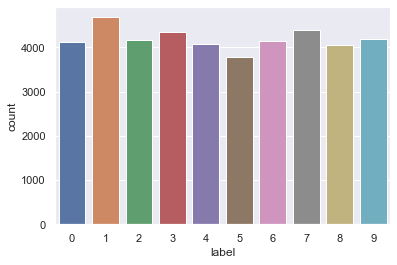

In [6]:
g = sns.countplot(y_train)
y_train.value_counts()

In [7]:
# Check Empty
X_train.isnull().any().describe()
number_test.isnull().any().describe()
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Random Forest

In [8]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=64, n_jobs=-1) 
start=datetime.now()
rnd_clf.fit(X_train, y_train)
end=datetime.now()
y_pred_rf = rnd_clf.predict(number_test)

In [9]:
# Print time
print(end-start)

0:00:03.248471


In [10]:
y_pred_rf = pd.Series(y_pred_rf ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_rf],axis = 1)
submission.to_csv("predictions-1.csv",index=False)

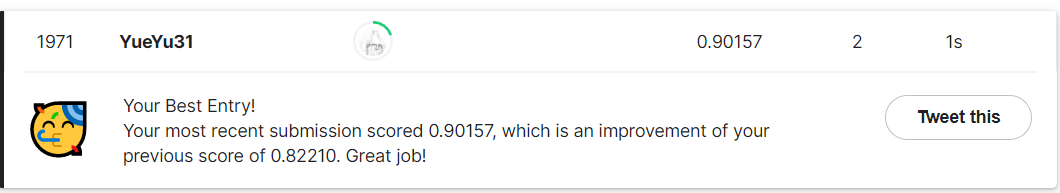

## PCA

In [11]:
from sklearn.decomposition import PCA
# X has 153 features, but DecisionTreeClassifier is expecting 154 features as input.
pca=PCA(n_components=154)
start=datetime.now()
XD_train=pca.fit_transform(X_train)
end=datetime.now()

In [12]:
# Print time
print(end-start)

0:00:01.141051


In [13]:
start=datetime.now()
XD_test=pca.fit_transform(number_test)
end=datetime.now()

In [14]:
# Print time
print(end-start)

0:00:00.783717


## Random Forest (95%)

In [15]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=64, n_jobs=-1) 
start=datetime.now()
rnd_clf.fit(XD_train, y_train)
end=datetime.now()
y_pred_rf = rnd_clf.predict(XD_test)

In [16]:
# Print time
print(end-start)

0:00:06.458746


In [17]:
y_pred_rf = pd.Series(y_pred_rf ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_rf],axis = 1)
submission.to_csv("predictions-2.csv",index=False)

In [18]:
eigenvalues = pca.components_.reshape(154, 28, 28)
eigenvalues = pca.components_

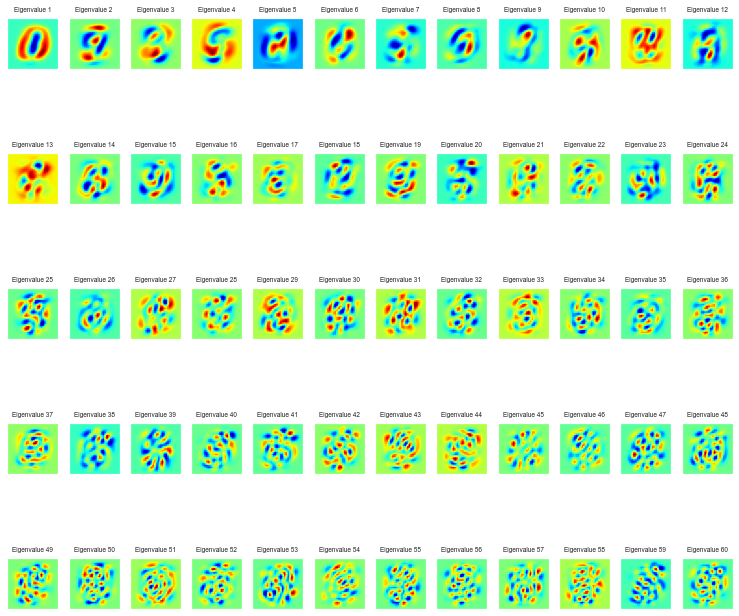

In [19]:
n_row = 5
n_col = 12
# Plot the first 28 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

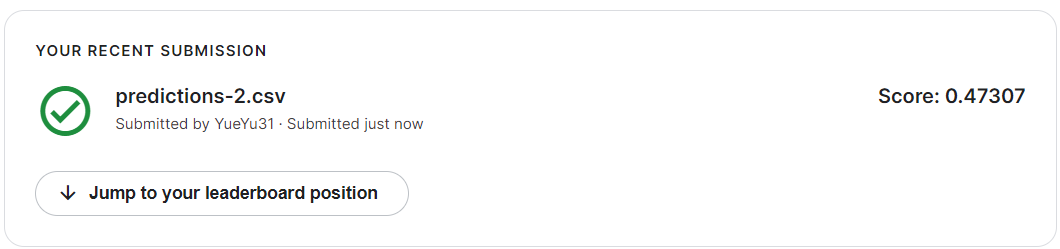

## K-Means Clustering

In [20]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics
X = number_train.loc[:,number_train.columns != 'label']
y = number_train['label']

In [21]:
kmeans = KMeans(n_clusters=10)
start=datetime.now()
kmeans.fit(X)
end=datetime.now()

In [22]:
# Print time
print(end-start)

0:00:12.626737


In [23]:
y_pred_rf = kmeans.predict(number_test)

In [24]:
y_pred_rf = pd.Series(y_pred_rf ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred_rf],axis = 1)
submission.to_csv("predictions-3.csv",index=False)

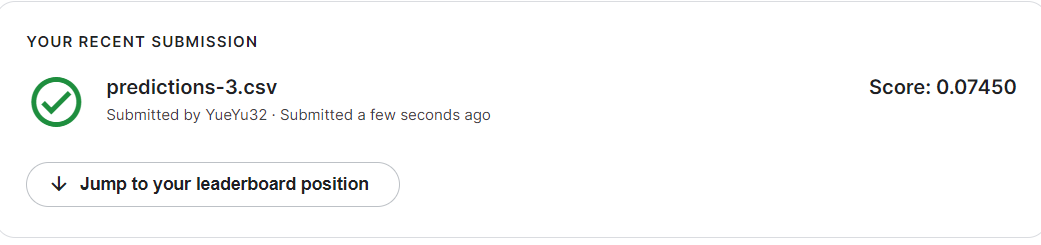

## K-Means Clustering 2

In [33]:
start=datetime.now()
reduced_data = PCA(n_components=0.95).fit_transform(number_test)
end=datetime.now()

In [34]:
# Print time
print(end-start)

0:00:00.896877


In [35]:
kmeans = KMeans(init='k-means++', n_clusters=10)
start=datetime.now()
kmeans.fit(reduced_data) 
end=datetime.now()
result = kmeans.labels_

In [36]:
# Print time
print(end-start)

0:00:02.090729


In [37]:
centroids = kmeans.cluster_centers_

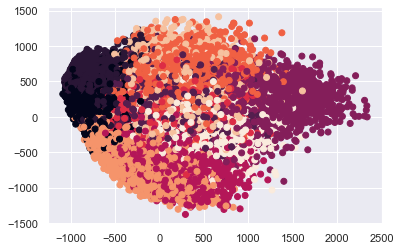

In [38]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],c=kmeans.labels_)

In [39]:
result = pd.Series(result ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result],axis = 1)
submission.to_csv("predictions-5.csv",index=False)

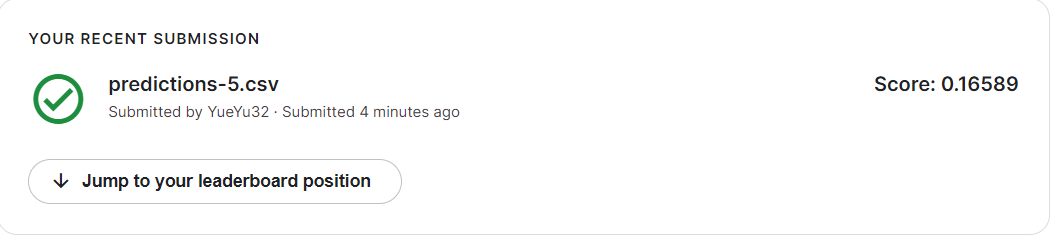

## K-Means Clustering 3

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [66]:
X_KMeans = X.copy()
X_test_KMeans = number_test.copy()

In [67]:
pipeline = Pipeline(steps = [
    ('KMeans',KMeans(n_clusters=10)), 
    ('RF',RandomForestClassifier(n_estimators=500, max_leaf_nodes=64, n_jobs=-1))
])
start=datetime.now()
pipeline.fit(X_KMeans,y)
end=datetime.now()

In [68]:
# Print time
print(end-start)

0:00:15.692264


In [69]:
pipeline_preds = pipeline.predict(number_test)

In [71]:
pipeline_preds = pd.Series(pipeline_preds ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pipeline_preds],axis = 1)
submission.to_csv("predictions-6.csv",index=False)

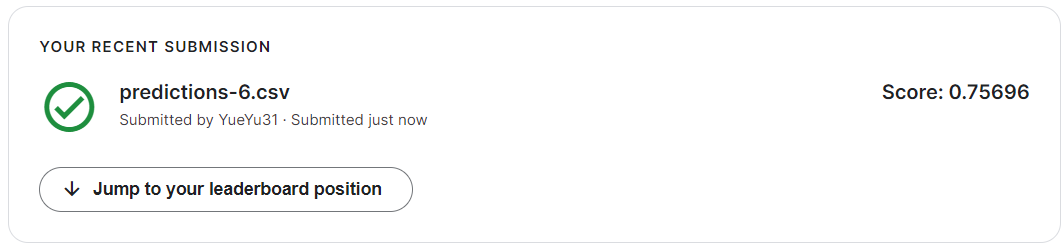

In [72]:
pipeline = Pipeline(steps = [
    ('KMeans',KMeans(n_clusters=100)), 
    ('RF',RandomForestClassifier(n_estimators=500, max_leaf_nodes=64, n_jobs=-1))
])
start=datetime.now()
pipeline.fit(X_KMeans,y)
end=datetime.now()

In [73]:
# Print time
print(end-start)

0:01:35.077915


In [74]:
pipeline_preds = pipeline.predict(number_test)

In [75]:
pipeline_preds = pd.Series(pipeline_preds ,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),pipeline_preds],axis = 1)
submission.to_csv("predictions-7.csv",index=False)

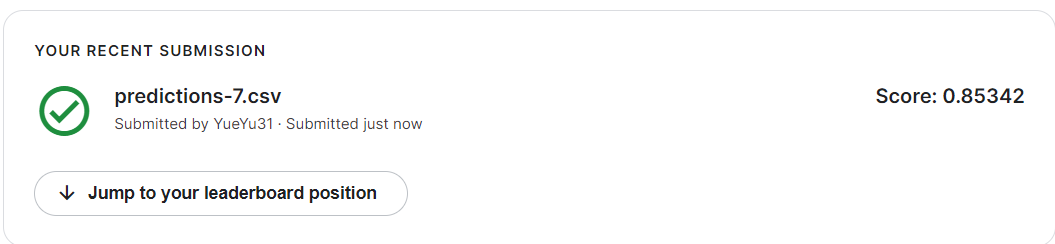

## Conclusion


In the tests of the above models, random Forest still has the best speed and score. The dimension reduction efficiency of PCA is very high, which can significantly reduce the number of features. Still, it is being applied in a Random Forest, and the small fraction and time of parameters are not notably improved, which makes me very confused. As for k-means Clustering, I think it is very suitable for classifying related predictions, but I have encountered difficulties in identification. The results are often unsatisfactory and random. It seems that the score fluctuates very much because of the starting point. After all, K-means is suitable for use with PCA and other models. Although my final score in my homework did not exceed RF alone, I would not question its ability.